In [1]:
import pandas as pd

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
df_ad = pd.read_csv("../results_eo/molnet_eo_ad.csv", index_col=0)
df_ia = pd.read_csv("../results_eo/molnet_eo_ia.csv", index_col=0)
df_ic = pd.read_csv("../results_eo/molnet_eo_ic.csv", index_col=0)
df_od = pd.read_csv("../results_eo/molnet_eo_od.csv", index_col=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


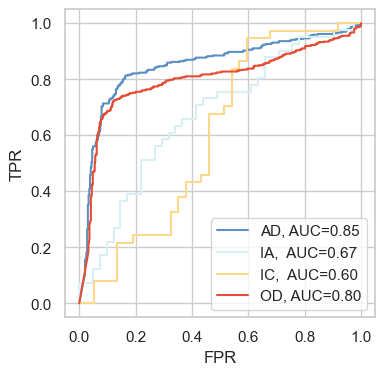

In [4]:
plt.figure(figsize=(4, 4))
alpha = 1
colors = plt.cm.get_cmap('RdYlBu_r')(np.linspace(0.15, 0.85, 4))

fpr, tpr, thresh = metrics.roc_curve(df_ad['True'], df_ad['Pred'].astype(float))
auc = metrics.roc_auc_score(df_ad['True'], df_ad['Pred'])
plt.plot(fpr, tpr, label="AD, AUC={:.2f}".format(auc), alpha=alpha, color=colors[0])

fpr, tpr, thresh = metrics.roc_curve(df_ia['True'], df_ia['Pred'].astype(float))
auc = metrics.roc_auc_score(df_ia['True'], df_ia['Pred'])
plt.plot(fpr, tpr, label="IA,  AUC={:.2f}".format(auc), alpha=alpha, color=colors[1])

fpr, tpr, thresh = metrics.roc_curve(df_ic['True'], df_ic['Pred'].astype(float))
auc = metrics.roc_auc_score(df_ic['True'], df_ic['Pred'])
plt.plot(fpr, tpr, label="IC,  AUC={:.2f}".format(auc), alpha=alpha, color=colors[2])

fpr, tpr, thresh = metrics.roc_curve(df_od['True'], df_od['Pred'].astype(float))
auc = metrics.roc_auc_score(df_od['True'], df_od['Pred'])
plt.plot(fpr, tpr, label="OD, AUC={:.2f}".format(auc), alpha=alpha, color=colors[3])

plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('./elution_order_pred.eps', dpi=600, bbox_inches='tight', format='eps')
plt.savefig('./elution_order_pred.png', dpi=600, bbox_inches='tight')
plt.show()